In [1]:
"""File creating dataframes to represent the price of treasuries per election cycle.
This assumes that the treasuries are issued at the start of each cycle(election cycle or non-election cycle)
"""

import FixedIncomeAnalysisClass as FI
from DateRanges import election_day
import pandas as pd
import datetime as dt

#importing treasury curve data
df = pd.read_csv("Data/TreasuryData/Cleaned-Data/cleaned_treasury_data.csv")
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)

# Cleaning data
df.interpolate(inplace=True)
df.dropna(axis = 1, inplace = True)

# Renaming the dataframe and sorting
name_map = {}
for name in df.columns:
    year = int(name.split()[0])
    if name.split()[1] == "Mo":
        year /= 12

    name_map[name] = year

df.rename(columns=name_map,inplace=True)

#setting an empty dataframe to put the data in
new_df = pd.DataFrame(columns= df.columns)

#setting an empty dataframe for price+coupon data
price_p_coupon = pd.DataFrame(columns= df.columns)

In [2]:
new_df

,0.5,1.0,2.0,3.0,5.0,7.0,10.0,30.0


In [3]:
#calculating prices for different treasuries per year 
for year in range(1992,2025):
    e_day = election_day(year)

    #creating the start and end dates of each cycle
    start = e_day - dt.timedelta(days = 52/2 *7) # Keeping the start day a tuesday 26 weeks (6 months) prior
    end = e_day + dt.timedelta(days = 14)

    #filtering the dataframe
    filtered_df = df.loc[start:end]

    #Getting a maturities Series
    maturities = pd.Series(filtered_df.columns)

    #Applying the Treasury new_price method to each maturity with respect to the filtered dataframe
    prices = maturities.apply(lambda x : FI.Treasury(x, filtered_df).new_price())
    prices = prices.T

    #Applying the Treasury price_plus_coupon method with respect to each filtered dataframe
    p_plus_coupon = maturities.apply(lambda x : FI.Treasury(x, filtered_df).price_plus_coupon())
    p_plus_coupon = p_plus_coupon.T


    #renaming the columns
    prices.rename(columns= maturities, inplace=True)
    p_plus_coupon.rename(columns= maturities, inplace=True)

    #concatenating the new dataframe
    new_df =  pd.concat([new_df, prices])
    price_p_coupon = pd.concat([price_p_coupon, p_plus_coupon])


/var/folders/49/1jq9sd950fg6397s7sm972380000gn/T/ipykernel_78574/3186560679.py:29: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_df =  pd.concat([new_df, prices])
/var/folders/49/1jq9sd950fg6397s7sm972380000gn/T/ipykernel_78574/3186560679.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df =  pd.concat([new_df, prices])
/var/folders/49/1jq9sd950fg6397s7sm972380000gn/T/ipykernel_78574/3186560679.py:30: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this wi

In [4]:
new_df

,0.5,1.0,2.0,3.0,5.0,7.0,10.0,30.0
1992-05-05,98.055421,99.943285,99.850616,99.771784,99.599177,99.496434,99.296032,99.603068
1992-05-06,98.085932,100.006623,99.964082,99.845500,99.794917,99.684535,100.069499,99.199264
1992-05-07,98.087298,99.981427,99.812046,99.703030,99.647348,99.655453,99.859257,99.428647
1992-05-08,98.107828,100.034764,99.926817,99.945149,99.967336,100.069305,100.456923,100.607485
1992-05-11,98.144713,100.115737,100.079088,100.169487,100.116981,100.246663,100.589361,100.880323
...,...,...,...,...,...,...,...,...
2024-11-13,100.000000,100.427858,100.804221,100.781443,100.708663,100.416088,99.975270,99.183252
2024-11-14,100.000000,100.425878,100.723026,100.645351,100.618272,100.406210,100.066077,99.926301
2024-11-15,100.000000,100.432181,100.777286,100.727728,100.721104,100.531565,100.114983,99.463656
2024-11-18,100.000000,100.467420,100.836331,100.810638,100.841873,100.639236,100.218894,99.444423


In [5]:
price_p_coupon

,0.5,1.0,2.0,3.0,5.0,7.0,10.0,30.0
1992-05-05,98.055421,99.943285,99.850616,99.771784,99.599177,99.496434,99.296032,99.603068
1992-05-06,98.085932,100.006623,99.964082,99.845500,99.794917,99.684535,100.069499,99.199264
1992-05-07,98.087298,99.981427,99.812046,99.703030,99.647348,99.655453,99.859257,99.428647
1992-05-08,98.107828,100.034764,99.926817,99.945149,99.967336,100.069305,100.456923,100.607485
1992-05-11,98.144713,100.115737,100.079088,100.169487,100.116981,100.246663,100.589361,100.880323
...,...,...,...,...,...,...,...,...
2024-11-13,100.000000,102.992858,103.214221,103.081443,102.948663,102.651088,102.210270,101.488252
2024-11-14,100.000000,102.990878,103.133026,102.945351,102.858272,102.641210,102.301077,102.231301
2024-11-15,100.000000,102.997181,103.187286,103.027728,102.961104,102.766565,102.349983,101.768656
2024-11-18,100.000000,103.032420,103.246331,103.110638,103.081873,102.874236,102.453894,101.749423


In [10]:
price_p_coupon.to_csv("Data/TreasuryData/Treasury-Price-Plus-Coupon-Data.csv")

In [6]:
new_df.to_csv("Data/TreasuryData/Treasury-Price-Data.csv")

In [7]:
new_df[30][new_df.index <= dt.datetime(1993,1,1)]

1992-05-05     99.603068
1992-05-06     99.199264
1992-05-07     99.428647
1992-05-08    100.607485
1992-05-11    100.880323
                 ...    
1992-11-10    103.354946
1992-11-12    104.788611
1992-11-13    104.581207
1992-11-16    104.616475
1992-11-17    104.933202
Name: 30.0, Length: 136, dtype: float64

<Axes: >

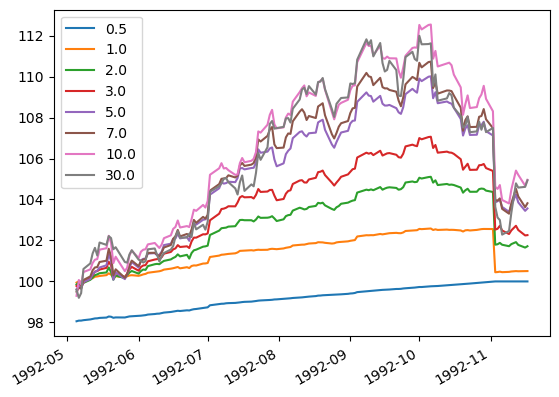

In [8]:
new_df[new_df.index <dt.datetime(1993,1,1)].plot()

In [9]:
new_df

,0.5,1.0,2.0,3.0,5.0,7.0,10.0,30.0
1992-05-05,98.055421,99.943285,99.850616,99.771784,99.599177,99.496434,99.296032,99.603068
1992-05-06,98.085932,100.006623,99.964082,99.845500,99.794917,99.684535,100.069499,99.199264
1992-05-07,98.087298,99.981427,99.812046,99.703030,99.647348,99.655453,99.859257,99.428647
1992-05-08,98.107828,100.034764,99.926817,99.945149,99.967336,100.069305,100.456923,100.607485
1992-05-11,98.144713,100.115737,100.079088,100.169487,100.116981,100.246663,100.589361,100.880323
...,...,...,...,...,...,...,...,...
2024-11-13,100.000000,100.427858,100.804221,100.781443,100.708663,100.416088,99.975270,99.183252
2024-11-14,100.000000,100.425878,100.723026,100.645351,100.618272,100.406210,100.066077,99.926301
2024-11-15,100.000000,100.432181,100.777286,100.727728,100.721104,100.531565,100.114983,99.463656
2024-11-18,100.000000,100.467420,100.836331,100.810638,100.841873,100.639236,100.218894,99.444423
